In [1]:
# add path if package is not installed
import sys
sys.path.append('..')

In [2]:
# importing matplotlib module
from matplotlib import pyplot as plt
import numpy as np

%matplotlib widget

In [3]:
from tensegrity.prism import Prism

prisms = [Prism(n) for n in (3, 4, 6, 12)]

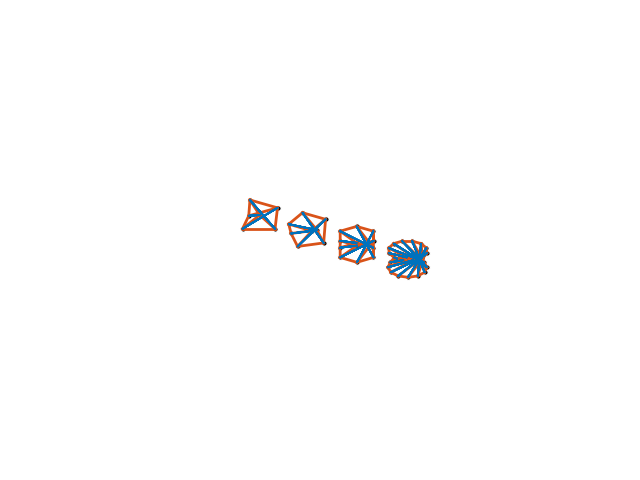

In [4]:
from tensegrity.plotter import MatplotlibPlotter

plotter = MatplotlibPlotter()
plotter.plot([s.translate(np.array([3*i,0,0])) for i, s in enumerate(prisms)])
plt.axis('equal')
plt.axis('off')
plt.show()